In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os
os.chdir('../logs/')

In [2]:
def plot(name0, name1, title):
    logs0 = np.load(name0, allow_pickle=True)
    logs1 = np.load(name1, allow_pickle=True)
    print(logs1['params'])
    t_loss0 = logs0['t_loss']
    t_loss1 = logs1['t_loss']
    epochs0 = np.arange(len(t_loss0))
    epochs1 = np.arange(len(t_loss1))

    plt.semilogy(epochs0, t_loss0)
    plt.semilogy(epochs1, t_loss1)
    plt.xlabel('Steps')
    plt.ylabel('Loss')
    plt.title(title)

In [3]:
def plot2(name0, title):
    logs0 = np.load(name0, allow_pickle=True)
    print(logs0['params'])
    t_loss0 = logs0['t_loss']
    v_loss0 = logs0['v_loss']
    epochs0 = np.arange(len(t_loss0))

    plt.semilogy(epochs0, t_loss0)
    plt.semilogy(epochs0, v_loss0)
    plt.xlabel('Steps')
    plt.ylabel('Loss')
    plt.title(title)

## 2020-4-10 Initial training
* 100 self plays games using randomly-initialized networks
Results:
* Network at 10 epochs is weaker than random. Network at 100 epochs is even weaker.
* Overfitting on data at less than 10 epochs. I need much more training data.

Namespace(batch_size=1024, decay=1e-05, epochs=100, lr=0.1, momentum=0.9, t_tuple=(0, 100), weights='00000')


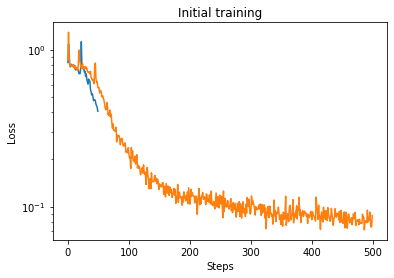

In [3]:
names = [f'from00000_0_100bs1024lr0.1d1e-05e{e}.npz' for e in (10, 100)]
plot(*names, 'Initial training')
plt.show()

## Validation and more data
* Overfitting after ~4 epochs.
* Ideally, I'd like to train for 8 epochs to get at least $(1-\tfrac{1}{e})$ fraction of all permutations of $D_4$ augmentation.

Namespace(batch_size=1024, decay=1e-05, epochs=10, lr=0.1, momentum=0.9, t_tuple=[10, 100], v_tuple=[0, 10], weights='00000')


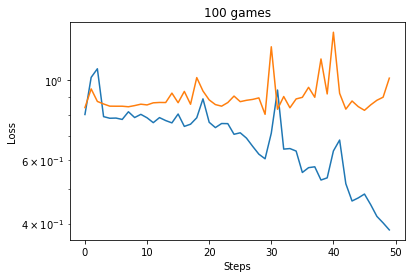

In [4]:
name = 'from00000_10_100bs1024lr0.1d1e-05e10.npz'
plot2(name, '100 games')
plt.show()

Namespace(batch_size=1024, decay=1e-05, epochs=10, lr=0.1, momentum=0.9, t_tuple=(20, 200), v_tuple=(0, 20), weights='00000')


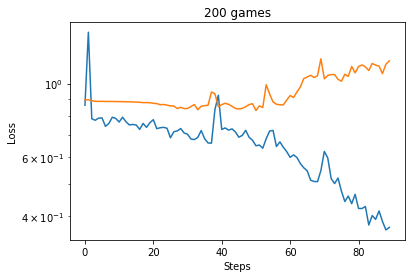

In [9]:
name = 'from00000_20_200bs1024lr0.1d1e-05e10.npz'
plot2(name, '200 games')
plt.show()

Namespace(batch_size=1024, decay=1e-05, epochs=10, lr=0.1, momentum=0.9, t_tuple=[30, 300], v_tuple=[0, 30], weights='00000')


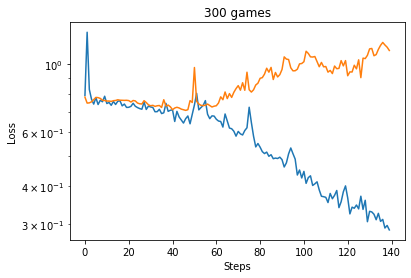

In [10]:
name = 'from00000_30_300bs1024lr0.1d1e-05e10.npz'
plot2(name, '300 games')
plt.show()

Namespace(batch_size=1024, decay=1e-05, epochs=10, lr=0.1, momentum=0.9, t_tuple=[40, 400], v_tuple=[0, 40], weights='00000')


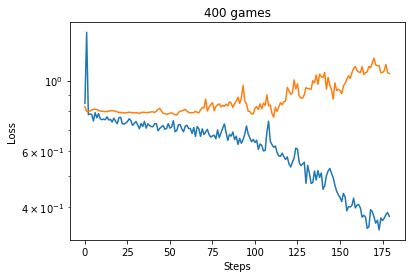

In [11]:
name = 'from00000_40_400bs1024lr0.1d1e-05e10.npz'
plot2(name, '400 games')
plt.show()

Namespace(batch_size=1024, decay=1e-05, epochs=10, lr=0.1, momentum=0.9, t_tuple=[50, 500], v_tuple=[0, 50], weights='00000')


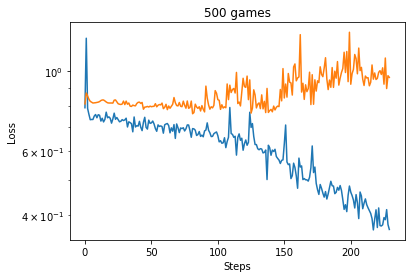

In [12]:
name = 'from00000_50_500bs1024lr0.1d1e-05e10.npz'
plot2(name, '500 games')
plt.show()

Namespace(batch_size=1024, decay=0.001, epochs=10, lr=0.1, momentum=0.9, t_tuple=[50, 500], v_tuple=[0, 50], weights='00000')


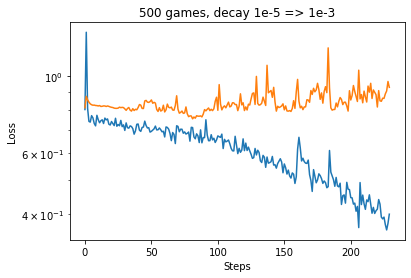

In [13]:
name = 'from00000_50_500bs1024lr0.1d0.001e10.npz'
plot2(name, '500 games, decay 1e-5 => 1e-3')
plt.show()

Namespace(batch_size=2048, decay=0.001, epochs=10, lr=0.1, momentum=0.9, t_tuple=[50, 500], v_tuple=[0, 50], weights='00000')
Overfitting occurs slower


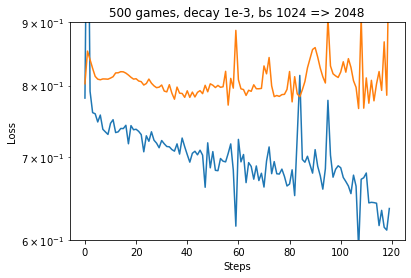

In [20]:
name = 'from00000_50_500bs2048lr0.1d0.001e10.npz'
plot2(name, '500 games, decay 1e-3, bs 1024 => 2048')

plt.ylim([.6, .9])
plt.show()

## Only train 4 epochs

Namespace(batch_size=2048, decay=0.001, epochs=4, lr=0.1, momentum=0.9, t_tuple=[50, 500], v_tuple=[0, 50], weights='00000')


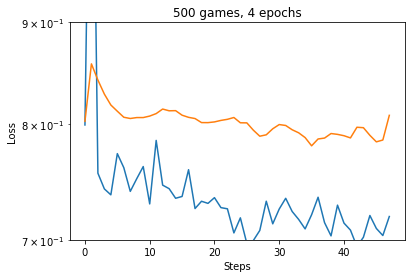

In [22]:
name = 'from00000_50_500bs2048lr0.1d0.001e4.npz'
plot2(name, '500 games, 4 epochs')
plt.ylim([.7, .9])
plt.show()

Namespace(batch_size=2048, decay=0.001, epochs=4, lr=0.1, momentum=0.9, t_tuple=[50, 500], v_tuple=[0, 50], weights='00000')


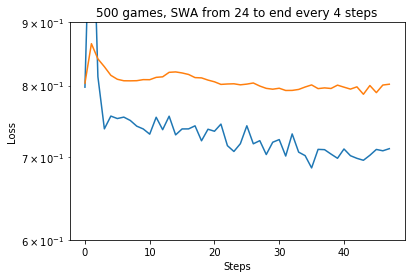

In [24]:
name = 'SWA_from00000_50_500bs2048lr0.1d0.001e4.npz'
plot2(name, '500 games, SWA from 24 to end every 4 steps')
plt.ylim([.6, .9])
plt.show()

## More data